In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve, roc_auc_score, precision_recall_curve

# Read csv file
data = pd.read_csv('creditcard.csv')

print(data)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Count the number of fraudulent and non-fraudulent transactions
transaction_counts = df['Class'].value_counts()

# Display the results
print("Total number of transactions:")
print(f"Non-fraudulent transactions (Class = 0): {transaction_counts[0]}")
print(f"Fraudulent transactions (Class = 1): {transaction_counts[1]}")


Total number of transactions:
Non-fraudulent transactions (Class = 0): 284315
Fraudulent transactions (Class = 1): 492


In [3]:
# get first five rows of the dataset
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
# Get summary statistics of the dataset
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [5]:
# get information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# check the missing values of the dataste
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


building process of logistic regression (using v1,v2) (preprocessing step)

In [7]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

import numpy as np

# Load the dataset
original_dataset_path = 'creditcard.csv'
df = pd.read_csv(original_dataset_path)

# Preprocessing phase 
# Select columns
selected_columns = ['Time', 'V1', 'Amount', 'Class']
df_selected = df[selected_columns]

# Selection of 60 fraudulent transactions
df_fraud = df_selected[df_selected['Class'] == 1].sample(n=60, random_state=1)

# Selection of 100 non-fraudulent transactions
df_non_fraud = df_selected[df_selected['Class'] == 0].sample(n=100, random_state=1)

# Combining process of the selected samples
df_balanced = pd.concat([df_fraud, df_non_fraud])

# Outlier detection function using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data,75)
    quartile_difference  = Q3 - Q1
    lower_bound = Q1 - 1.5 * quartile_difference
    upper_bound = Q3 + 1.5 * quartile_difference
    return (data < lower_bound) | (data > upper_bound)

# Apply outlier detection to each feature
outliers_iqr = df_balanced[['Time', 'V1', 'Amount']].apply(detect_outliers_iqr)

# Print the number of outliers detected
print("Number of outliers detected:")
print(outliers_iqr.sum())

# Removing outliers from the balanced dataset
df_no_outliers = df_balanced[~outliers_iqr.any(axis=1)]

# Split data into features and target
X_balanced = df_no_outliers[['Time', 'V1', 'Amount']]
y_balanced = df_no_outliers['Class']

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# Build the logistic regression model
model_balanced = LogisticRegression(random_state=1, max_iter=1000)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Predictions on the test set
y_pred_balanced = model_balanced.predict(X_test_balanced)
# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Print the results
print(f"Accuracy: {accuracy_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)
print("Classification Report-------------------------")
print(class_report_balanced)
'''

'\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import classification_report, accuracy_score, confusion_matrix\n\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve\n\nimport numpy as np\n\n# Load the dataset\noriginal_dataset_path = \'creditcard.csv\'\ndf = pd.read_csv(original_dataset_path)\n\n# Preprocessing phase \n# Select columns\nselected_columns = [\'Time\', \'V1\', \'Amount\', \'Class\']\ndf_selected = df[selected_columns]\n\n# Selection of 60 fraudulent transactions\ndf_fraud = df_selected[df_selected[\'Class\'] == 1].sample(n=60, random_state=1)\n\n# Selection of 100 non-fraudulent transactions\ndf_non_fraud = df_selected[df_selected[\'Class\'] == 0].sample(n=100, random_state=1)\n\n# Combining process of the selected samples\ndf_balanced = pd.concat([df_fraud, df_non_fraud])\n\n# Outlier detection function using I

Accuracy: 0.86
Confusion Matrix:
[[195  17]
 [ 25  63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       212
           1       0.79      0.72      0.75        88

    accuracy                           0.86       300
   macro avg       0.84      0.82      0.83       300
weighted avg       0.86      0.86      0.86       300



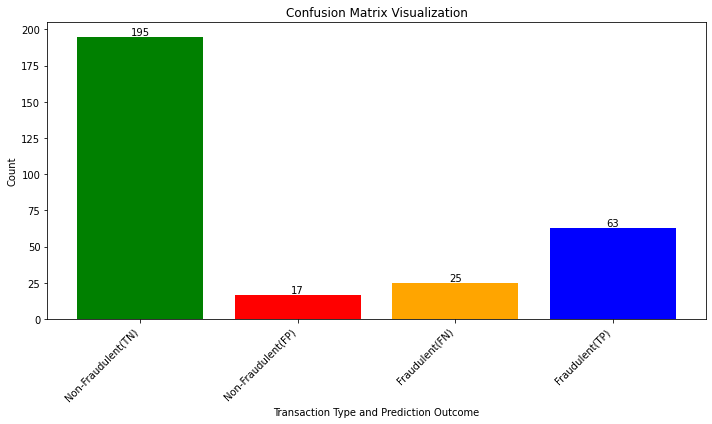

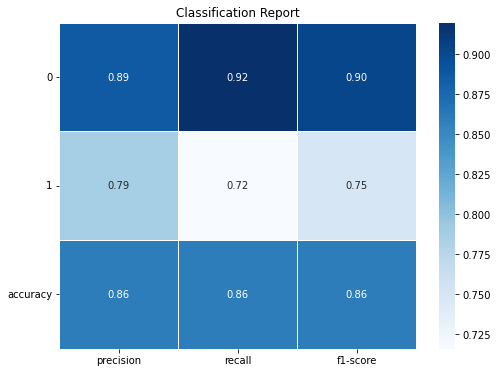

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
original_dataset_path = 'creditcard.csv'
df = pd.read_csv(original_dataset_path)

# Preprocessing phase 
# Select columns
selected_columns = ['Time', 'V2', 'Amount', 'Class']
df_selected = df[selected_columns]

# Selection of 300 fraudulent transactions
df_fraud = df_selected[df_selected['Class'] == 1].sample(n=300, random_state=1)

# Selection of 700 non-fraudulent transactions
df_non_fraud = df_selected[df_selected['Class'] == 0].sample(n=700, random_state=1)

# Combining process of the selected samples
df_balanced = pd.concat([df_fraud, df_non_fraud])

# Split data into features and target
X_balanced = df_balanced[['Time', 'V2', 'Amount']]
y_balanced = df_balanced['Class']

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# Build the logistic regression model
model_balanced = LogisticRegression(random_state=1, max_iter=1000)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Predictions on the test set
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Print the results
print(f"Accuracy: {accuracy_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)
print("Classification Report:")
print(class_report_balanced)

# Visualization of the confusion matrix as a bar graph with updated labels and counts
labels = [
    'Non-Fraudulent(TN)', 
    'Non-Fraudulent(FP)', 
    'Fraudulent(FN)', 
    'Fraudulent(TP)'
]
counts = [conf_matrix_balanced[0, 0], conf_matrix_balanced[0, 1], conf_matrix_balanced[1, 0], conf_matrix_balanced[1, 1]]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=['green', 'red', 'orange', 'blue'])

# Add counts on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - (-1), f'{count}', ha='center', color='black')

plt.title('Confusion Matrix Visualization')
plt.xlabel('Transaction Type and Prediction Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Get the classification report as a dictionary
report = classification_report(y_test_balanced, y_pred_balanced, output_dict=True)

# Convert the dictionary to a DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column and the macro avg and weighted avg rows
report_df = report_df.drop(columns=['support'])
report_df = report_df.drop(['macro avg', 'weighted avg'])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)

plt.title('Classification Report')
plt.yticks(rotation=0)
plt.show()




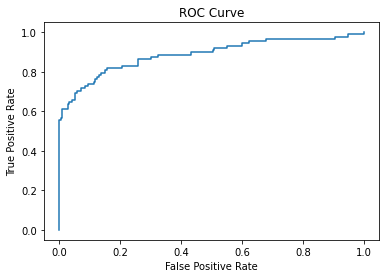

Best Threshold based on Accuracy: 0.68 with Accuracy: 0.88


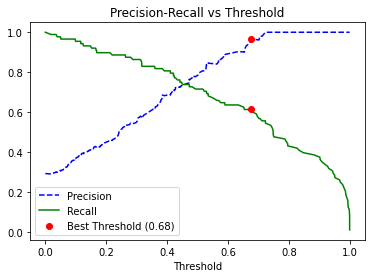

Accuracy with custom threshold: 0.88
Confusion Matrix with custom threshold:
[[210   2]
 [ 34  54]]
Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       212
           1       0.96      0.61      0.75        88

    accuracy                           0.88       300
   macro avg       0.91      0.80      0.84       300
weighted avg       0.89      0.88      0.87       300



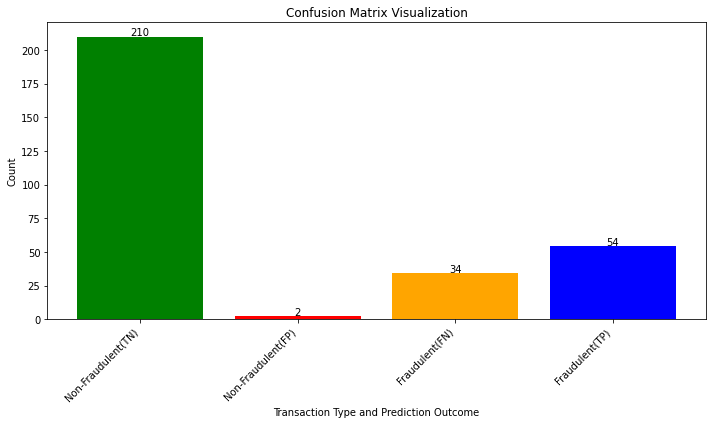

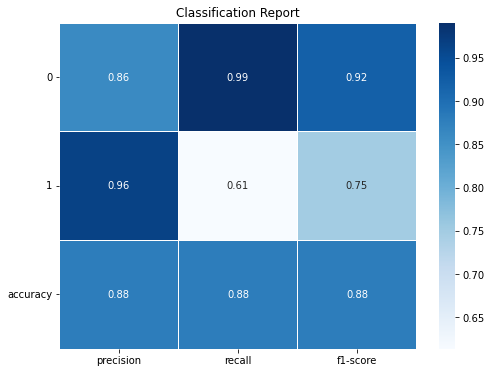

In [9]:
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Predict probabilities on the test set
y_probs_balanced = model_balanced.predict_proba(X_test_balanced)[:, 1]

# Step 2: Plot ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test_balanced, y_probs_balanced)
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Step 3: Plot Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_balanced, y_probs_balanced)

# Find the optimal threshold based on F1 score
thresholds_range = np.linspace(0, 1, num=100)
best_f1 = 0
best_threshold = 0
best_accuracy = 0

for threshold in thresholds_range:
    y_pred_temp = (y_probs_balanced >= threshold).astype(int)
    current_f1 = f1_score(y_test_balanced, y_pred_temp)
    current_accuracy = accuracy_score(y_test_balanced, y_pred_temp)
    
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"Best Threshold based on Accuracy: {best_threshold:.2f} with Accuracy: {best_accuracy:.2f}")

# Plot Precision-Recall Curve and highlight the best threshold
plt.figure()
plt.plot(thresholds_pr, precision[:-1], "b--", label="Precision")
plt.plot(thresholds_pr, recall[:-1], "g-", label="Recall")

# Highlight the best threshold
optimal_idx_pr = np.argmin(np.abs(thresholds_pr - best_threshold))
plt.scatter(thresholds_pr[optimal_idx_pr], precision[optimal_idx_pr], color='red', label=f"Best Threshold ({best_threshold:.2f})", zorder=5)
plt.scatter(thresholds_pr[optimal_idx_pr], recall[optimal_idx_pr], color='red', zorder=5)

plt.xlabel("Threshold")
plt.title("Precision-Recall vs Threshold")
plt.legend(loc="best")
plt.show()

# Step 5: Predict with the best threshold
y_pred_balanced_custom = (y_probs_balanced >= best_threshold).astype(int)

# Step 6: Evaluate the model
accuracy_balanced_custom = accuracy_score(y_test_balanced, y_pred_balanced_custom)
conf_matrix_balanced_custom = confusion_matrix(y_test_balanced, y_pred_balanced_custom)
class_report_balanced_custom = classification_report(y_test_balanced, y_pred_balanced_custom)

# Print the results
print(f"Accuracy with custom threshold: {accuracy_balanced_custom}")
print("Confusion Matrix with custom threshold:")
print(conf_matrix_balanced_custom)
print("Classification Report with custom threshold:")
print(class_report_balanced_custom)

# Visualization of the confusion matrix as a bar graph with updated labels and counts
labels = [
    'Non-Fraudulent(TN)', 
    'Non-Fraudulent(FP)', 
    'Fraudulent(FN)', 
    'Fraudulent(TP)'
]
counts = [conf_matrix_balanced_custom[0, 0], conf_matrix_balanced_custom[0, 1], conf_matrix_balanced_custom[1, 0], conf_matrix_balanced_custom[1, 1]]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=['green', 'red', 'orange', 'blue'])

# Add counts on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - (-1), f'{count}', ha='center', color='black')

plt.title('Confusion Matrix Visualization')
plt.xlabel('Transaction Type and Prediction Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Get the classification report as a dictionary
report = classification_report(y_test_balanced, y_pred_balanced_custom, output_dict=True)

# Convert the dictionary to a DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column and the macro avg and weighted avg rows
report_df = report_df.drop(columns=['support'])
report_df = report_df.drop(['macro avg', 'weighted avg'])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)

plt.title('Classification Report')
plt.yticks(rotation=0)
plt.show()


building process of random forest (using v1,v2) (preprocessing step)

Accuracy: 0.85
Confusion Matrix:
[[197  15]
 [ 30  58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       212
           1       0.79      0.66      0.72        88

    accuracy                           0.85       300
   macro avg       0.83      0.79      0.81       300
weighted avg       0.85      0.85      0.85       300



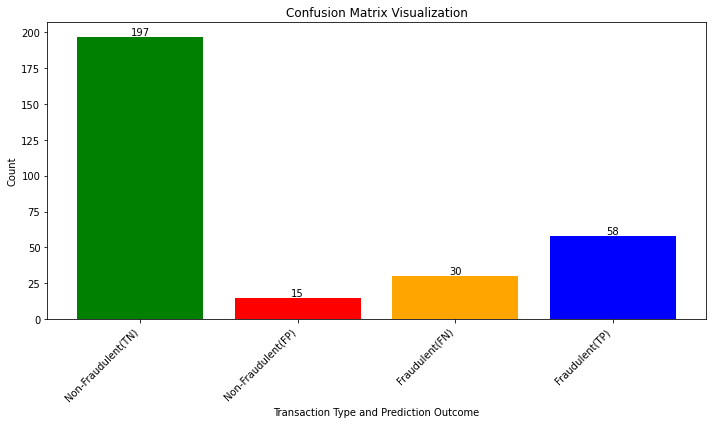

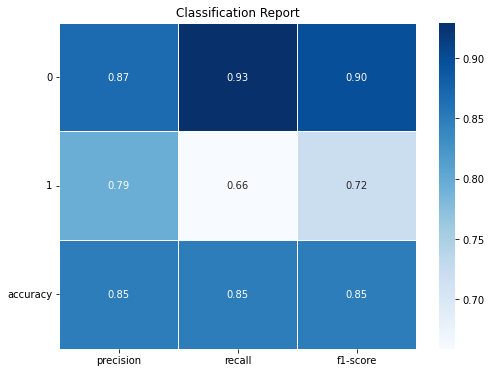

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Load the dataset
original_dataset_path = 'creditcard.csv'
df = pd.read_csv(original_dataset_path)

# Preprocessing phase 
# Select columns
selected_columns = ['Time', 'V1', 'Amount', 'Class']
df_selected = df[selected_columns]

# Selection of 300 fraudulent transactions
df_fraud = df_selected[df_selected['Class'] == 1].sample(n=300, random_state=1)

# Selection of 700 non-fraudulent transactions
df_non_fraud = df_selected[df_selected['Class'] == 0].sample(n=700, random_state=1)

# Combining process of the selected samples
df_balanced = pd.concat([df_fraud, df_non_fraud])

# Split data into features and target
X_balanced = df_balanced[['Time', 'V1', 'Amount']]
y_balanced = df_balanced['Class']

# Split data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=1)

# Build the Random Forest model
model_balanced = RandomForestClassifier(random_state=1, n_estimators=100)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Predictions on the test set
y_pred_balanced = model_balanced.predict(X_test_balanced)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
conf_matrix_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
class_report_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Print the results
print(f"Accuracy: {accuracy_balanced}")
print("Confusion Matrix:")
print(conf_matrix_balanced)
print("Classification Report:")
print(class_report_balanced)

# Visualization of the confusion matrix as a bar graph with updated labels and counts
labels = [
    'Non-Fraudulent(TN)', 
    'Non-Fraudulent(FP)', 
    'Fraudulent(FN)', 
    'Fraudulent(TP)'
]
counts = [conf_matrix_balanced[0, 0], conf_matrix_balanced[0, 1], conf_matrix_balanced[1, 0], conf_matrix_balanced[1, 1]]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=['green', 'red', 'orange', 'blue'])

# Add counts on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - (-1), f'{count}', ha='center', color='black')

plt.title('Confusion Matrix Visualization')
plt.xlabel('Transaction Type and Prediction Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Get the classification report as a dictionary
report = classification_report(y_test_balanced, y_pred_balanced, output_dict=True)

# Convert the dictionary to a DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column and the macro avg and weighted avg rows
report_df = report_df.drop(columns=['support'])
report_df = report_df.drop(['macro avg', 'weighted avg'])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)

plt.title('Classification Report')
plt.yticks(rotation=0)
plt.show()

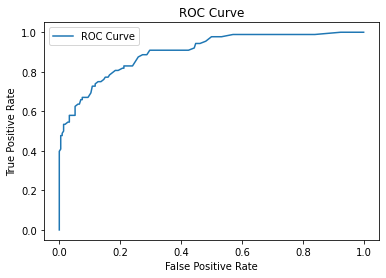

Best Threshold based on Accuracy: 0.54 with Accuracy: 0.85


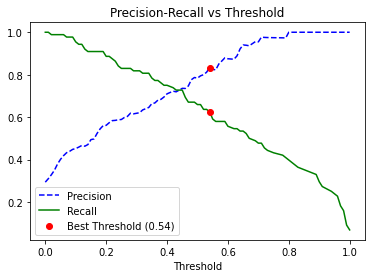

Accuracy with custom threshold: 0.8533333333333334
Confusion Matrix with custom threshold:
[[201  11]
 [ 33  55]]
Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       212
           1       0.83      0.62      0.71        88

    accuracy                           0.85       300
   macro avg       0.85      0.79      0.81       300
weighted avg       0.85      0.85      0.85       300



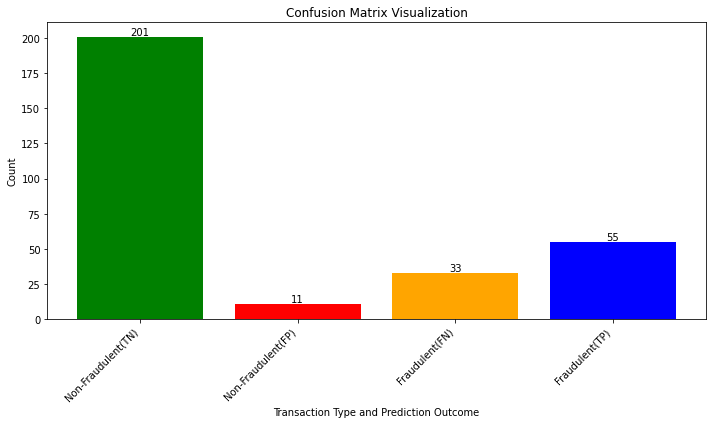

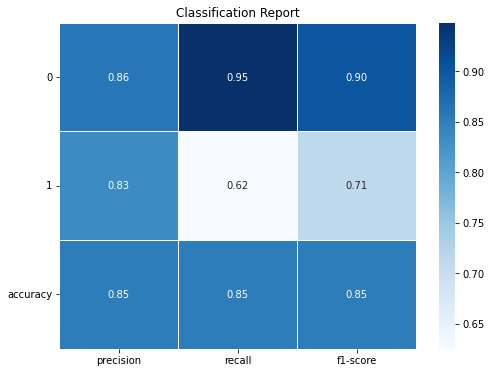

In [11]:
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Step 1: Predict probabilities on the test set using the Random Forest model
y_probs_balanced = model_balanced.predict_proba(X_test_balanced)[:, 1] # type: ignore

# Step 2: Plot ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test_balanced, y_probs_balanced)
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Step 3: Plot Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test_balanced, y_probs_balanced)

# Find the optimal threshold based on accuracy
thresholds_range = np.linspace(0, 1, num=100)
best_accuracy = 0
best_threshold = 0

for threshold in thresholds_range:
    y_pred_temp = (y_probs_balanced >= threshold).astype(int)
    current_accuracy = accuracy_score(y_test_balanced, y_pred_temp)
    
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = threshold

print(f"Best Threshold based on Accuracy: {best_threshold:.2f} with Accuracy: {best_accuracy:.2f}")

# Plot Precision-Recall Curve and highlight the best threshold
plt.figure()
plt.plot(thresholds_pr, precision[:-1], "b--", label="Precision")
plt.plot(thresholds_pr, recall[:-1], "g-", label="Recall")

# Highlight the best threshold
optimal_idx_pr = np.argmin(np.abs(thresholds_pr - best_threshold))
plt.scatter(thresholds_pr[optimal_idx_pr], precision[optimal_idx_pr], color='red', label=f"Best Threshold ({best_threshold:.2f})", zorder=5)
plt.scatter(thresholds_pr[optimal_idx_pr], recall[optimal_idx_pr], color='red', zorder=5)

plt.xlabel("Threshold")
plt.title("Precision-Recall vs Threshold")
plt.legend(loc="best")
plt.show()

# Step 5: Predict with the best threshold
y_pred_balanced_custom = (y_probs_balanced >= best_threshold).astype(int)

# Step 6: Evaluate the model
accuracy_balanced_custom = accuracy_score(y_test_balanced, y_pred_balanced_custom)
conf_matrix_balanced_custom = confusion_matrix(y_test_balanced, y_pred_balanced_custom)
class_report_balanced_custom = classification_report(y_test_balanced, y_pred_balanced_custom)

# Print the results
print(f"Accuracy with custom threshold: {accuracy_balanced_custom}")
print("Confusion Matrix with custom threshold:")
print(conf_matrix_balanced_custom)
print("Classification Report with custom threshold:")
print(class_report_balanced_custom)

# Visualization of the confusion matrix as a bar graph with updated labels and counts
labels = [
    'Non-Fraudulent(TN)', 
    'Non-Fraudulent(FP)', 
    'Fraudulent(FN)', 
    'Fraudulent(TP)'
]
counts = [conf_matrix_balanced_custom[0, 0], conf_matrix_balanced_custom[0, 1], conf_matrix_balanced_custom[1, 0], conf_matrix_balanced_custom[1, 1]]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=['green', 'red', 'orange', 'blue'])

# Add counts on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - (-1), f'{count}', ha='center', color='black')

plt.title('Confusion Matrix Visualization')
plt.xlabel('Transaction Type and Prediction Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Get the classification report as a dictionary
report = classification_report(y_test_balanced, y_pred_balanced_custom, output_dict=True)

# Convert the dictionary to a DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Drop the 'support' column and the macro avg and weighted avg rows
report_df = report_df.drop(columns=['support'])
report_df = report_df.drop(['macro avg', 'weighted avg'])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)

plt.title('Classification Report')
plt.yticks(rotation=0)
plt.show()



